In [2]:
# Importing all of the required libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# Reading the dataset and printing first 5 records of it
df = pd.read_csv('data.csv')
df.head()

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
# Checking the number of instances and number of attributes/features in the dataset
df.shape

(130086, 29)

In [5]:
# Checking the statistical measures of the dataset
df.describe()

,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,130086.000000,130086.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,...,130086.000000,130086.000000,130086.00000,130086.000000,130086.000000,130086.0,130086.000000,130086.000000,130086.000000,130086.000000
mean,8.583048,48.842201,0.261810,0.948467,0.811652,0.401216,0.569823,1.834425,0.105680,4.848333,...,0.283559,0.908806,2.41205,0.055671,0.080009,0.0,0.193349,0.948326,0.130675,0.036622
std,7.297112,14.038089,1.092346,1.880123,1.824188,1.065413,1.628655,2.596754,0.307429,2.027548,...,0.847804,1.386168,1.22286,0.229286,0.271308,0.0,0.509199,2.143749,0.337046,0.187832
min,0.032854,16.689938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.249829,37.878166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,2.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,7.006160,49.147159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,3.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,11.610540,58.858316,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,...,0.000000,2.000000,3.00000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,63.091034,99.348392,12.000000,53.000000,26.000000,18.000000,29.000000,53.000000,1.000000,53.000000,...,16.000000,36.000000,36.00000,1.000000,1.000000,0.0,4.000000,45.000000,1.000000,1.000000


In [6]:
# Checking the brief info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130086 entries, 0 to 130085
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DATE_FOR               130086 non-null  object 
 1   RTD_ST_CD              130086 non-null  object 
 2   CustomerSegment        130086 non-null  object 
 3   Tenure                 130086 non-null  float64
 4   Age                    130086 non-null  float64
 5   MART_STATUS            130086 non-null  object 
 6   GENDER                 130086 non-null  object 
 7   CHANNEL1_6M            129277 non-null  float64
 8   CHANNEL2_6M            129277 non-null  float64
 9   CHANNEL3_6M            129277 non-null  float64
 10  CHANNEL4_6M            129277 non-null  float64
 11  CHANNEL5_6M            129277 non-null  float64
 12  METHOD1_6M             129277 non-null  float64
 13  RECENT_PAYMENT         129277 non-null  float64
 14  PAYMENTS_6M            129277 non-nu

In [7]:
# Checking if any of the columns contain any null values
df.isnull().sum()

DATE_FOR                   0
RTD_ST_CD                  0
CustomerSegment            0
Tenure                     0
Age                        0
MART_STATUS                0
GENDER                     0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M                0
CHANNEL5_3M                0
METHOD1_3M                 0
PAYMENTS_3M                0
NOT_DI_3M                  0
NOT_DI_6M                  0
EVENT1_30_FLAG             0
EVENT2_90_SUM              0
LOGINS                     0
POLICYPURCHASECHANNEL      0
Call_Flag                  0
dtype: int64

In [8]:
# printing the column names in the dataset
df.columns

Index(['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'Tenure', 'Age',
       'MART_STATUS', 'GENDER', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'NOT_DI_3M',
       'NOT_DI_6M', 'EVENT1_30_FLAG', 'EVENT2_90_SUM', 'LOGINS',
       'POLICYPURCHASECHANNEL', 'Call_Flag'],
      dtype='object')

In [9]:
# Filling the null values in the columns having the null values with the mean value of the column
cols = ['CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M',
        'RECENT_PAYMENT', 'PAYMENTS_6M']
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [10]:
df.isnull().sum()

DATE_FOR                 0
RTD_ST_CD                0
CustomerSegment          0
Tenure                   0
Age                      0
MART_STATUS              0
GENDER                   0
CHANNEL1_6M              0
CHANNEL2_6M              0
CHANNEL3_6M              0
CHANNEL4_6M              0
CHANNEL5_6M              0
METHOD1_6M               0
RECENT_PAYMENT           0
PAYMENTS_6M              0
CHANNEL1_3M              0
CHANNEL2_3M              0
CHANNEL3_3M              0
CHANNEL4_3M              0
CHANNEL5_3M              0
METHOD1_3M               0
PAYMENTS_3M              0
NOT_DI_3M                0
NOT_DI_6M                0
EVENT1_30_FLAG           0
EVENT2_90_SUM            0
LOGINS                   0
POLICYPURCHASECHANNEL    0
Call_Flag                0
dtype: int64

In [11]:
# Encoding the categorical features to have numeric values, so that a model can be trained on them
cols = ['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'MART_STATUS', 'GENDER']
for col in cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130086 entries, 0 to 130085
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DATE_FOR               130086 non-null  int32  
 1   RTD_ST_CD              130086 non-null  int32  
 2   CustomerSegment        130086 non-null  int32  
 3   Tenure                 130086 non-null  float64
 4   Age                    130086 non-null  float64
 5   MART_STATUS            130086 non-null  int32  
 6   GENDER                 130086 non-null  int32  
 7   CHANNEL1_6M            130086 non-null  float64
 8   CHANNEL2_6M            130086 non-null  float64
 9   CHANNEL3_6M            130086 non-null  float64
 10  CHANNEL4_6M            130086 non-null  float64
 11  CHANNEL5_6M            130086 non-null  float64
 12  METHOD1_6M             130086 non-null  float64
 13  RECENT_PAYMENT         130086 non-null  float64
 14  PAYMENTS_6M            130086 non-nu

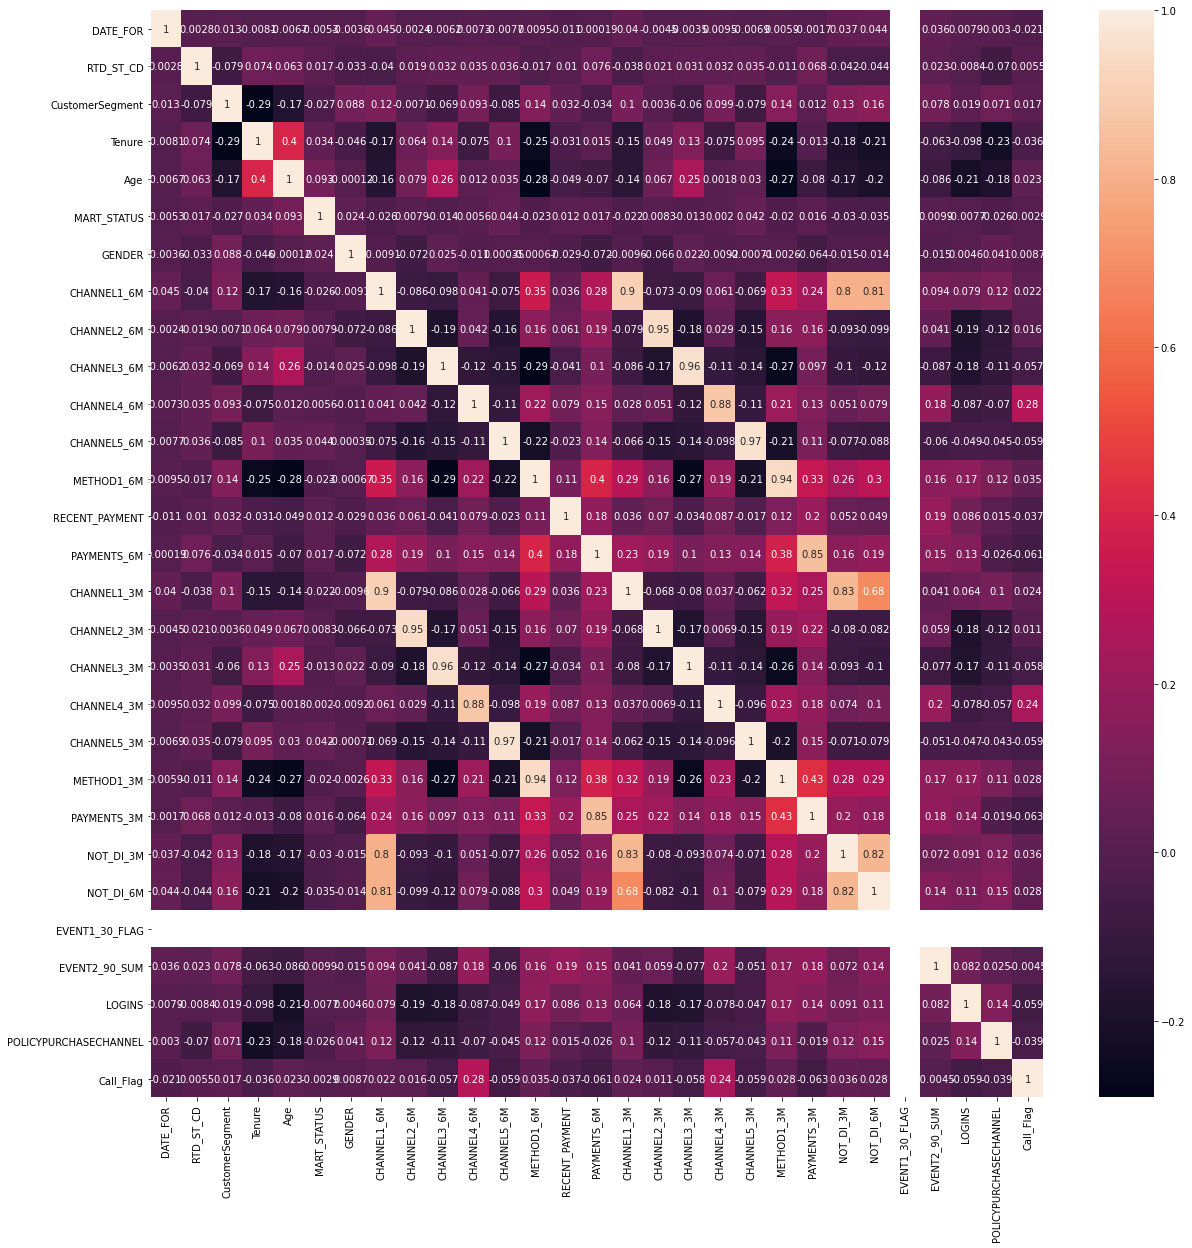

In [13]:
# Plotting the correlation among the attributes to see how they correlate to each other
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()

In [14]:
# Dropping the 'EVENT1_30_FLAG' attribute as it contains all zeroes
df = df.drop(['EVENT1_30_FLAG'], axis=1)
df

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,6,0,0,16.175222,78.403833,0,0,0.0,0.0,1.0,...,0,2,0,3,0,0,0,0,0,0
1,4,0,0,15.931554,70.989733,1,0,0.0,6.0,0.0,...,0,0,3,3,0,0,0,0,0,0
2,2,0,0,15.937029,87.578371,2,1,0.0,0.0,10.0,...,0,0,0,6,0,0,0,0,0,0
3,3,1,0,15.934292,68.438056,2,1,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,7,0,0,15.501711,80.514716,0,0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130081,4,8,3,0.131417,46.258727,2,1,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
130082,6,36,3,0.117728,36.574949,1,1,0.0,0.0,0.0,...,0,0,0,2,0,0,0,0,0,0
130083,3,6,3,0.131417,56.906229,3,1,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
130084,2,6,3,0.087611,23.857632,2,1,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
# Splitting the dataset into features to train and the target values
X = df.drop(['Call_Flag'], axis=1)
y = df['Call_Flag']
X.shape, y.shape

((130086, 27), (130086,))

In [16]:
# Splitting the dataset into the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=19)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((104068, 27), (104068,), (26018, 27), (26018,))

In [17]:
# Initializing, training and testing a logistic regression classifier on the training and test set
# Using the accuracy, precision, recall, f1-score and confusion matrix as the evaluation measure
logistic_regression_model = LogisticRegression(max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

preds = logistic_regression_model.predict(X_test)
print('Logistic Regression Model:')
print('Accuracy: ', accuracy_score(y_test, preds))
print('Precision: ', precision_score(y_test, preds))
print('Recall: ', recall_score(y_test, preds))
print('F1-measure: ', f1_score(y_test, preds))
print('Confusion Matrix:\n', confusion_matrix(y_test, preds))

Logistic Regression Model:
Accuracy:  0.9632177723114766
Precision:  0.47115384615384615
Recall:  0.05152471083070452
F1-measure:  0.09289099526066351
Confusion Matrix:
 [[25012    55]
 [  902    49]]


In [18]:
# Initializing, training and testing a decision tree classifier on the training and test set
# Using the accuracy, precision, recall, f1-score and confusion matrix as the evaluation measure
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

preds = decision_tree_model.predict(X_test)
print('Decision Tree Model:')
print('Accuracy: ', accuracy_score(y_test, preds))
print('Precision: ', precision_score(y_test, preds))
print('Recall: ', recall_score(y_test, preds))
print('F1-measure: ', f1_score(y_test, preds))
print('Confusion Matrix:\n', confusion_matrix(y_test, preds))

Decision Tree Model:
Accuracy:  0.9366592359135982
Precision:  0.18289353958143767
Recall:  0.2113564668769716
F1-measure:  0.19609756097560976
Confusion Matrix:
 [[24169   898]
 [  750   201]]


In [19]:
# Initializing, training and testing a random forest classifier on the training and test set
# Using the accuracy, precision, recall, f1-score and confusion matrix as the evaluation measure
random_forest_model = RandomForestClassifier(n_jobs=-1)
random_forest_model.fit(X_train, y_train)

preds = random_forest_model.predict(X_test)
print('Random Forest Model:')
print('Accuracy: ', accuracy_score(y_test, preds))
print('Precision: ', precision_score(y_test, preds))
print('Recall: ', recall_score(y_test, preds))
print('F1-measure: ', f1_score(y_test, preds))
print('Confusion Matrix:\n', confusion_matrix(y_test, preds))

Random Forest Model:
Accuracy:  0.9641017756937504
Precision:  0.5594405594405595
Recall:  0.08412197686645637
F1-measure:  0.14625228519195613
Confusion Matrix:
 [[25004    63]
 [  871    80]]


In [20]:
pickle.dump(logistic_regression_model, open('logistic_regression_model.pkl', 'wb'))
pickle.dump(decision_tree_model, open('decision_tree_model.pkl', 'wb'))
pickle.dump(random_forest_model, open('random_forest_model.pkl', 'wb'))

In [23]:
df.iloc[-1, :]

DATE_FOR                  6.000000
RTD_ST_CD                50.000000
CustomerSegment           2.000000
Tenure                    9.434634
Age                      32.276523
MART_STATUS               1.000000
GENDER                    0.000000
CHANNEL1_6M               0.000000
CHANNEL2_6M               3.000000
CHANNEL3_6M               0.000000
CHANNEL4_6M               0.000000
CHANNEL5_6M               0.000000
METHOD1_6M                3.000000
RECENT_PAYMENT            0.000000
PAYMENTS_6M               3.000000
CHANNEL1_3M               0.000000
CHANNEL2_3M               2.000000
CHANNEL3_3M               0.000000
CHANNEL4_3M               0.000000
CHANNEL5_3M               0.000000
METHOD1_3M                2.000000
PAYMENTS_3M               2.000000
NOT_DI_3M                 0.000000
NOT_DI_6M                 0.000000
EVENT2_90_SUM             0.000000
LOGINS                    0.000000
POLICYPURCHASECHANNEL     0.000000
Call_Flag                 0.000000
Name: 130085, dtype: